In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy 

LOWER = 4050
UPPER = 4100


In [26]:
# Read data
df = pd.read_csv('data/apr-10-spx.csv')

In [27]:
# Compute parameters
df["location"] = df["SPX"]
df["scale"] = df["SPX"].std()

In [31]:
# Compute probability
df["probability"] = cauchy.cdf(UPPER, df["location"], df["scale"]) - cauchy.cdf(LOWER, df["location"], df["scale"])
df["probability_norm"] = norm.cdf(UPPER, df["location"], df["scale"]) - norm.cdf(LOWER, df["location"], df["scale"])

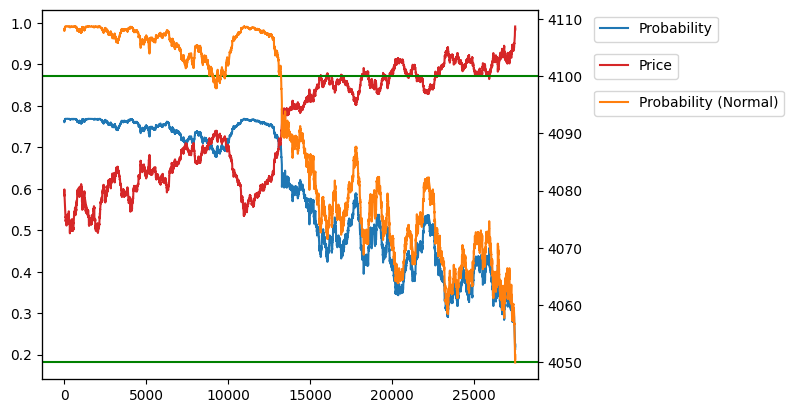

In [54]:
# Plot probability and price
fig, ax1 = plt.subplots()
ax1.plot(df["Index"], df["probability"], color="tab:blue")

ax2 = ax1.twinx()
ax2.plot(df["Index"], df["SPX"], color="tab:red")
ax2.axhline(y=4050, color='g', linestyle='-')
ax2.axhline(y=4100, color='g', linestyle='-')

ax3 = ax1.twinx()
ax3.plot(df["Index"], df["probability_norm"], color="tab:orange")
# Plot ax3 on same scale as ax1
ax1.set_ylim(ax3.get_ylim())
# Don't plot ax3 y axis values
ax3.set_yticks([])

# Plot legend
ax1.legend(["Probability"], bbox_to_anchor=(1.10, 1), loc="upper left")
ax2.legend(["Price"], bbox_to_anchor=(1.10, 0.9), loc="upper left")
ax3.legend(["Probability (Normal)"], bbox_to_anchor=(1.10, 0.8), loc="upper left")